## Quick Recap:
RNA-Seq is a powerful method used in molecular biology to study gene expression. It is a technique that allows scientists to measure the amount of RNA molecules produced by cells or tissues under different conditions.

To understand RNA-Seq, we first need to know what RNA is. RNA stands for Ribonucleic Acid, and it is a molecule that plays an important role in the process of gene expression. RNA acts as a messenger between DNA (the genetic material of the cell) and proteins (the functional molecules that perform many tasks in the cell).

RNA-Seq works by isolating RNA from cells or tissues and converting it into a complementary DNA (cDNA) library. This cDNA library is then sequenced using high-throughput sequencing technologies, which generate millions of short reads that represent the RNA molecules present in the sample.

Once the reads are generated, bioinformaticians use specialized software to analyze them and map them back to the genome or transcriptome of the organism being studied. This mapping step allows scientists to identify which genes are expressed in the sample and how much RNA is being produced by each gene.

RNA-Seq can provide insights into a variety of biological processes, such as gene regulation, cellular differentiation, and disease states. It has revolutionized the field of molecular biology and is now widely used in research labs around the world.

## Scenario (Exemplary):

We started by obtaining raw sequencing reads in .fastq format from the sequencing facility. Before analyzing the data, we performed Quality Control (QC) checks to ensure the quality of the reads. These checks included assessing the distribution of read lengths, looking for the presence of adapter sequences, and checking for the presence of any low-quality reads.

Once we were satisfied with the quality of the reads, we used software such as STAR to map the reads to a transcriptome. We then used software such as SALMON to quantify the expression levels of each transcript, which gave us the number of reads that mapped to each transcript in the transcriptome, and then we used transcript counts to aggregate to gene level expression.

Now, our data consists of gene level counts for each sample, and we are expected to analyze it.

## We will do the following:

**Firstly**, to get a quick overview of the samples, we will use a technique called Principal Component Analysis (PCA). This technique allows us to visualize the similarities and differences between the samples based on their gene expression profiles. It was a useful way to check if the samples clustered together based on the expected biological variables (e.g., organ type or treatment condition).

**Next**, we want to compare gene expression between different conditions, such as different organs or treatment conditions. To do this, we use a statistical method called differential gene expression analysis. This method compares the expression of each gene between two or more conditions and identified genes that were expressed differently. We used software such as DESeq2 to perform differential gene expression analysis.

**Finally**, once we have identified the differentially expressed genes, we wante to understand which biological pathways or processes were affected. We do this using gene set enrichment analysis, which compared the differentially expressed genes to known sets of genes involved in specific biological pathways or processes. We use software such as EnrichR or GSEA to perform gene set enrichment analysis.

## Info on data:

Sequencing libraries are created from total extracted mRNAs from different organs of healthy mice, after Cisplatin treatment or kept untreated.

## Info on condition:

Cisplatin is a chemotherapy drug commonly used to treat various types of cancer. It works by binding to DNA molecules in cancer cells and causing damage to the DNA strands. The damage caused by cisplatin can activate the cell's DNA repair mechanisms, including nucleotide excision repair (NER).

Nucleotide excision repair is a DNA repair mechanism that removes and replaces damaged nucleotides (the building blocks of DNA) in the DNA strand. NER is a multi-step process that involves the recognition and removal of damaged DNA, followed by the insertion of new nucleotides to repair the damage.

In the case of cisplatin treatment, the drug causes a specific type of DNA damage known as DNA crosslinking, where the two strands of DNA are covalently linked together. This type of DNA damage is particularly toxic and can lead to cell death if left unrepaired. NER plays a critical role in repairing this type of damage caused by cisplatin.

However, cancer cells can also develop resistance to cisplatin by altering their DNA repair mechanisms, including NER. Some cancer cells may overexpress certain proteins involved in NER, allowing them to repair the DNA damage caused by cisplatin more efficiently and survive the treatment.

Overall, the relationship between cisplatin and NER is complex and can have significant implications for the effectiveness of cisplatin chemotherapy in treating cancer. Understanding this relationship is important for developing new strategies to overcome cisplatin resistance and improve cancer treatment outcomes.

[RNA-seq Dataset Info](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE117167)

The modules we are going to use are as followed:
1. PyDESeq2: is for Differential gene expression analysis. It is Python implementation of DESeq2 library which is originally in R.
2. GSEApy: is a Python/Rust implementation of GSEA and wrapper for Enrichr. Enrichr contains most comprehensive and popular gene set libraries. We are going to use it for gene set enrichment over the selected libraries to see which biological pathways are enriched on up-regulated and down-regulated gene sets.

In [ ]:
# After installing the below modules, dont forget to restart the runtime, as it needs to change the modules which the versions are changed.
!pip install --quiet numpy==1.23.0 pydeseq2 gseapy dash-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 61.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.5/278.5 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.5/752.5 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.7 MB/s eta 0

After restarting the runtime, Import the following modules. If you dont restart, numpy will give an error.

In [ ]:
import pandas as pd
import numpy as np
import copy
np.seterr(all="ignore")

# DGE and Pathway Enrichment
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import gseapy as gp
from gseapy import Biomart

# PCA
from sklearn.decomposition import PCA

# Viz.
import plotly.express as px
import dash_bio
from gseapy import dotplot

The following are helper functions for visualizations that are in DESeq2 but not in PyDESeq2 such as: Run PCA/plot, Volcano Plot, Dispersion Plot, MA Plot.

Run the following cell as we are going to need these functions in the downstream analysis.

In [ ]:
def plotPCA(dds, clinical_df, nTop=0, vst=True, returnData=False):

  if vst:
    counts = dds.layers['vst_counts']
  else:
    counts = dds.layers['normed_counts']

  colwise_var = np.var(counts, axis=0)
  idx = np.argpartition(colwise_var, -nTop)[-nTop:] if nTop > 0 else (-colwise_var).argsort()[:]

  pca = PCA(n_components=3)
  pca_data = pca.fit_transform(counts[:, idx])
  print(f'Explained Variance Ratio :{sum(pca.explained_variance_ratio_)}')

  index_to_use = dds.obsm['design_matrix'].index
  pca_df = pd.DataFrame(
      {'pc1': pca_data[:,0],
       'pc2': pca_data[:,1],
       'pc3': pca_data[:,2],
       'organ': clinical_df.loc[index_to_use]['organ'],
       'condition': clinical_df.loc[index_to_use]['condition']})

  fig = px.scatter_3d(pca_df, x='pc1', y='pc2', z='pc3',
                    color='organ', symbol='condition')
  fig.show()

  if returnData:
    return pca, pca_data

def plotVolcano(stat_res, lfc_thr=[-1, 1], padj_thr=0.05):
  res_df = stat_res.results_df

  plot_df = res_df.dropna()
  plot_df = pd.DataFrame({
      'EFFECTSIZE': np.array(plot_df['log2FoldChange']).astype(float),
      'P': np.array(plot_df['padj']).astype(float),
      'GENE': list(plot_df.index)})

  fig = dash_bio.VolcanoPlot(
      dataframe=plot_df,
      snp=None,
      genomewideline_value=-np.log10(padj_thr),
      effect_size_line=lfc_thr,
      ylabel='-log10(Adjusted p-value)',
      xlabel='Effect Size: log2(fold-change)')

  fig.show()

def plotDispEsts(dds):
  gene_est = list(np.log(dds.varm['genewise_dispersions']))
  fit = list(np.log(dds.varm['fitted_dispersions']))
  final = list(np.log(dds.varm['dispersions']))
  n = len(gene_est)

  m_norm_counts = list(np.log(np.average(dds.layers['normed_counts'], axis=0)))

  plot_df = pd.DataFrame({
      'dispersion': gene_est + fit + final,
      'name': ['Genewise Dispersions'] * n + ['Fitted Dispersions'] * n + ['Final Dispersions'] * n,
      'mean_norm_counts': m_norm_counts * 3
  })

  fig = px.scatter(plot_df, y = 'dispersion', x = 'mean_norm_counts', color = 'name', opacity=0.8)
  fig.show()

def plotMA(stat_res, padj_thr=0.05):
  dds = stat_res.dds
  res_df = stat_res.results_df

  colors = ['sig' if float(padj) <= padj_thr else 'non-sig' for padj in list(res_df['padj'])]
  l2fc =list(res_df['log2FoldChange'])

  m_norm_counts = np.log10(np.average(dds.layers['normed_counts'], axis=0))

  plot_df = pd.DataFrame({
      'padj Significance': colors,
      'log2 Fold-Change': l2fc,
      'log10 (Mean of Normalized Counts Per Gene)': m_norm_counts
  })

  fig = px.scatter(plot_df, y = 'log2 Fold-Change', x = 'log10 (Mean of Normalized Counts Per Gene)', color = 'padj Significance')
  fig.show()

Download the dge-data.zip file from SUCourse and extract. You will find two text files. Upload them on this colab notebook. Run the below cell.

**Task 1**: Print the two dataframes that you have imported. What do you see, describe both of the dataframes.

In [ ]:
clinical_df = pd.read_csv('/content/clinical.tsv', sep='\t')
clinical_df = clinical_df.set_index('sampleID')
clinical_df = clinical_df.sort_index(ascending=True)

counts_df = pd.read_csv('/content/counts.tsv', sep='\t')
counts_df = counts_df.set_index('geneIDs')
counts_df = counts_df.T.loc[clinical_df.index]
counts_df = counts_df.sort_index(ascending=True)

print(clinical_df)
print(counts_df)

             organ condition
sampleID                    
GSM3272779  kidney     untrt
GSM3272780  kidney       cis
GSM3272781  kidney     untrt
GSM3272782  kidney       cis
GSM3272787    lung       cis
GSM3272788    lung     untrt
GSM3272789    lung       cis
GSM3272790    lung     untrt
geneIDs     ENSMUSG00000102693  ENSMUSG00000051951  ENSMUSG00000025900  \
sampleID                                                                 
GSM3272779                   0                   8                  33   
GSM3272780                   0                   2                  10   
GSM3272781                   0                   4                  46   
GSM3272782                   0                   2                  26   
GSM3272787                   0                  15                 723   
GSM3272788                   2                  23                 571   
GSM3272789                   0                  43                3694   
GSM3272790                   0              

-----> Your answer for task 1 HERE (Double Click HERE to edit) <----

Each row in the clinical_df dataframe represents a sample, and the columns list its attributes. This dataframe contains information on samples. "Organ" and "condition" are the columns. Each sample is specifically identified by its "sampleID" index, which is set in the dataframe. Based on the sample IDs, the dataframe is arranged in ascending order.

Gene expression data are contained in the counts_df dataframe, where each row is a sample and each column denotes a particular gene. The samples are transposed such that they are shown as columns and the gene IDs are set as the dataframe's index. The counts_df dataframe's index lines up with the clinical_df dataframe's index. Based on the sample IDs, the dataframe is arranged in ascending order.

**Task 2**: Keep only the columns in the counts_df that the sum of the counts are bigger or equal than 10 for each gene. We want to eliminate genes which produced very low counts across all samples.

In [ ]:
#Filter out genes that have less than 10 counts across samples
counts_df = counts_df[counts_df.apply(lambda row: sum(row) >= 10, axis=1)]


**Task 3**: You are going to create DeseqDataSet object from your counts_df and clinical_df. DeseqDataSet object contains the methods for DESeq2 workflow and necessary transformations.

Go to this [link](https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_minimal_pydeseq2_pipeline.html#sphx-glr-auto-examples-plot-minimal-pydeseq2-pipeline-py)

Try to understand how to create DeseqDataSet object.

In [ ]:
# Create DESeq Dataset object and assign it to dds_all
dds_all = DeseqDataSet(
    counts=counts_df,
    clinical=clinical_df,
    design_factors="condition",
    refit_cooks=True,
    n_cpus=8,
)

**Task 4**: DeseqDataSet object contains a method for Variance Stabilizing Transformation (vst). Apply it to dds_all. We need this method to transform normalized counts, so that we can perform PCA.

In [ ]:
# Transform the normalized counts by Variance Stabilizing Transformation (vst) for PCA

dds_all.vst()


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 37.78 seconds.

Fitting dispersion trend curve...
... done in 12.53 seconds.



**Task 5**: Run the following cell to perform PCA and plot the results. Interpret the results with respect to biological relevance.

In [ ]:
plotPCA(dds_all, clinical_df, nTop=500, returnData=False)

Explained Variance Ratio :0.9918217147927527


-----> Your answer for task 5 HERE (Double Click HERE to edit) <----

The principle components (PCs) derived from the PCA analysis explain a significant amount of the overall variation in the gene expression data, as indicated by the explained variance ratio of 0.9918.
A high explained variance ratio shows that the top PCs retain a significant portion of the original data's information.

**Task 6**: We want to perform differential expression analysis to understand the effects of cisplatin treatment on kidney. Filter the clinical_df, where you only keep the rows that the organ is kidney. Filter the counts_df respectively. Create a new DeseqDataset object with new filtered data, and assign it to dds.

Dont forget to use **ref_level** parameter this time. Because we want our base level to be untreated samples. So that, positive fold changes of expression will be the genes that are upregulated after cisplatin treatment, and negative fold changes of expression will be the genes that are downregulated after cisplatin treatment.

Hint: Be careful with the DataFrame indexes. They should match between clinical_df and counts_df.

In [ ]:
# Filter clinical_df for kidney
kidney_clinical_df = clinical_df[clinical_df['organ'] == 'kidney']

# Filter counts_df for kidney
kidney_counts_df = counts_df.loc[kidney_clinical_df.index]

reference_level = ["condition", "untrt"]

dds = DeseqDataSet(
    counts=kidney_counts_df,
    clinical=kidney_clinical_df,
    design_factors="condition",
    ref_level=reference_level
)


In [ ]:
# Run DESeq2 workflow to Perform dispersion and log fold-change (LFC) estimation.
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 23.43 seconds.

Fitting dispersion trend curve...
... done in 10.34 seconds.

Fitting MAP dispersions...
... done in 28.65 seconds.

Fitting LFCs...
... done in 18.94 seconds.

Refitting 0 outliers.



**Task7**: Go to the [link](https://hbctraining.github.io/DGE_workshop/lessons/04_DGE_DESeq2_analysis.html). Do not try to use the code in the link -here- because it is for original implementation of DESeq2 in R. Try to understand how DESeq2 controls dispersion. Run the following cell to plot dispersion plot. Do you think the data is a good fit for the DESeq2 model? Explain what you see.

In [ ]:
# Plot dispersions
plotDispEsts(dds)

-----> Your answer for task 7 HERE (Double Click HERE to edit) <----

Yes, the data is a good fit for the DESeq2 model since we see that the data scatters around the curve, with the dispersion decreasing with increasing mean expression levels.

In [ ]:
# # Run this cell for the statistical tests for differential expression and lfc shrink
stat_res = DeseqStats(dds)
stat_res.summary()
stat_res_unshrunken = copy.deepcopy(stat_res)
# Shrink lfc
stat_res.lfc_shrink(coeff="condition_cis_vs_untrt")

Running Wald tests...
... done in 8.20 seconds.

Log2 fold change & Wald test p-value: condition cis vs untrt


baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneIDs                                                                         
ENSMUSG00000102693     0.000000             NaN       NaN       NaN       NaN   
ENSMUSG00000051951     4.787561       -1.540376  1.870816 -0.823371  0.410297   
ENSMUSG00000025900    27.481976       -1.091761  0.801097 -1.362833  0.172935   
ENSMUSG00000025902   372.698753        0.112377  0.387729  0.289834  0.771943   
ENSMUSG00000033845  1305.385311        0.098342  0.247240  0.397757  0.690809   
...                         ...             ...       ...       ...       ...   
ENSMUSG00000063698   122.326710       -0.633911  0.420001 -1.509310  0.131220   
ENSMUSG00000024997  7764.904920        0.098878  0.226794  0.435982  0.662850   
ENSMUSG00000003228   262.898049       -0.586806  0.343948 -1.706089  0.087992   
ENSMUSG00000074733   619.757355       -0.126621  0.463812 -0.273001  0.784852   
ENSMUSG00000059326   303.616736        0.474766  0.401686  1.181932  0.237233   

                        padj  
geneIDs                       
ENSMUSG00000102693       NaN  
ENSMUSG00000051951       NaN  
ENSMUSG00000025900  0.407519  
ENSMUSG00000025902  0.905447  
ENSMUSG00000033845  0.862695  
...                      ...  
ENSMUSG00000063698  0.342110  
ENSMUSG00000024997  0.847430  
ENSMUSG00000003228  0.260158  
ENSMUSG00000074733  0.911309  
ENSMUSG00000059326  0.495190  

[25059 rows x 6 columns]

Fitting MAP LFCs...
... done in 36.48 seconds.

Shrunk Log2 fold change & Wald test p-value: condition cis vs untrt


baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneIDs                                                                         
ENSMUSG00000102693     0.000000             NaN       NaN       NaN       NaN   
ENSMUSG00000051951     4.787561       -0.072936  0.510872 -0.823371  0.410297   
ENSMUSG00000025900    27.481976       -0.277569  0.549516 -1.362833  0.172935   
ENSMUSG00000025902   372.698753        0.062786  0.329994  0.289834  0.771943   
ENSMUSG00000033845  1305.385311        0.073139  0.229888  0.397757  0.690809   
...                         ...             ...       ...       ...       ...   
ENSMUSG00000063698   122.326710       -0.375331  0.388319 -1.509310  0.131220   
ENSMUSG00000024997  7764.904920        0.073335  0.213712  0.435982  0.662850   
ENSMUSG00000003228   262.898049       -0.406795  0.329143 -1.706089  0.087992   
ENSMUSG00000074733   619.757355       -0.060677  0.370047 -0.273001  0.784852   
ENSMUSG00000059326   303.616736        0.277024  0.364964  1.181932  0.237233   

                        padj  
geneIDs                       
ENSMUSG00000102693       NaN  
ENSMUSG00000051951       NaN  
ENSMUSG00000025900  0.407519  
ENSMUSG00000025902  0.905447  
ENSMUSG00000033845  0.862695  
...                      ...  
ENSMUSG00000063698  0.342110  
ENSMUSG00000024997  0.847430  
ENSMUSG00000003228  0.260158  
ENSMUSG00000074733  0.911309  
ENSMUSG00000059326  0.495190  

[25059 rows x 6 columns]

**Task8**: Go to this [link](https://hbctraining.github.io/DGE_workshop/lessons/05_DGE_DESeq2_analysis2.html) Try to understand statistical analysis that is performed by DESeq2 and how log2 foldchange shrinkage is applied. Next, Plot MA plot for shrunken lfc and unshrunken lfc. What do you see different?

Do not try to use the code in the link -here- because it is for original implementation of DESeq2 in R.

In [ ]:
#MA Plot for shrunken lfc
plotMA(stat_res, padj_thr=0.05)
#MA Plot for unshrunken lfc
plotMA(stat_res_unshrunken, padj_thr=0.05)

-----> Your answer for task 8 HERE (Double Click HERE to edit) <----

Since there is a change in the direction of folds, resulting graphs are different.

Volcano plot is a great way to get an overall picture of what is going on, where we plot the log transformed adjusted p-values plotted on the y-axis and log2 fold change values on the x-axis.

In [ ]:
#Volcano Plot
plotVolcano(stat_res)

Inspect the results table (res_df) that is created after statistical tests.

In [ ]:
res_df = stat_res.results_df
res_df

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
geneIDs                                                                         
ENSMUSG00000102693     0.000000             NaN       NaN       NaN       NaN   
ENSMUSG00000051951     4.787561       -0.072936  0.510872 -0.823371  0.410297   
ENSMUSG00000025900    27.481976       -0.277569  0.549516 -1.362833  0.172935   
ENSMUSG00000025902   372.698753        0.062786  0.329994  0.289834  0.771943   
ENSMUSG00000033845  1305.385311        0.073139  0.229888  0.397757  0.690809   
...                         ...             ...       ...       ...       ...   
ENSMUSG00000063698   122.326710       -0.375331  0.388319 -1.509310  0.131220   
ENSMUSG00000024997  7764.904920        0.073335  0.213712  0.435982  0.662850   
ENSMUSG00000003228   262.898049       -0.406795  0.329143 -1.706089  0.087992   
ENSMUSG00000074733   619.757355       -0.060677  0.370047 -0.273001  0.784852   
ENSMUSG00000059326   303.616736        0.277024  0.364964  1.181932  0.237233   

                        padj  
geneIDs                       
ENSMUSG00000102693       NaN  
ENSMUSG00000051951       NaN  
ENSMUSG00000025900  0.407519  
ENSMUSG00000025902  0.905447  
ENSMUSG00000033845  0.862695  
...                      ...  
ENSMUSG00000063698  0.342110  
ENSMUSG00000024997  0.847430  
ENSMUSG00000003228  0.260158  
ENSMUSG00000074733  0.911309  
ENSMUSG00000059326  0.495190  

[25059 rows x 6 columns]


**Task9:**

What does fold change mean? Where is p-value coming from? What is padj (Adjusted p-value)? What is Multiple test correction? Check again the link in Task8.

Filter the res_df where padj is smaller or equal to .05. So that we get differentially expressed genes that statistically significant.

Then,

Filter the res_df where log2FoldChange is bigger or equal than 1, and assign it to up_degs. (Up regulated genes where fold change is 2 times changed, log2foldchange 1 means 2)

Filter the res_df where log2FoldChange is smaller or equal than -1, and assign it to down_degs. (Down regulated genes where fold change is halfed, log2foldchange -1 means .5)

-----> Your text answer for task 9 HERE (Double Click HERE to edit) <----

Fold change is a measure that expresses the difference in a quantity between a measurement taken initially and one taken afterwards.

P-values are coming from the DESeq2 method.

Multiple test correction refers to the statistical techniques used to correct the increased risk of falsely rejecting a true null hypothesis  when multiple hypotheses are tested simultaneously.


In [ ]:
# filter the genes based on log2FC and Adjusted p-value, where log 2 folc change
up_degs = res_df[(res_df['log2FoldChange'] > 1) & (res_df['padj'] < 0.05)]
down_degs = res_df[(res_df['log2FoldChange'] < -1) & (res_df['padj'] < 0.05)]

After obtaining gene sets of upregulated and downregulated genes, we will perform gene set enrichment, with EnrichR api inside GSEApy. EnrichR needs Entrez Gene names instead of Ensembl gene ids. Think of it as different databases name genes differently.

Run the following cell.

In [ ]:
# Convert ensembl gene ids to Entrez Gene Names using biomart api inside gseapy via batch submission

def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def batch_subs(degs, n=20):
  bm = Biomart()

  gene_names = []
  for batch in chunks(degs, n):

    queries ={'ensembl_gene_id': batch }
    results = bm.query(dataset='mmusculus_gene_ensembl',
                      attributes=['entrezgene_accession'],
                      filters=queries)
    gene_names += list(results['entrezgene_accession'])

  return [i.upper() for i in gene_names]

gene_names_down = batch_subs(down_degs.index)
gene_names_up = batch_subs(up_degs.index)

**Task10**: Run the following cell. You will see all of the Mouse gene set libraries that are present within EnrichR. You will see a lot of GO and KEGGs with different years of version. What is [GO](http://geneontology.org/) database? GO is spllited into 3 major ontologies; Molecular Function, Cellular Component, Biological Process. What are they and how are they different? What is [KEGG](https://www.genome.jp/kegg/pathway.html) pathway database?

In [ ]:
# Check out libraries that are present for Mouse
gp.get_library_name(organism='Mouse')

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisGeNET',
 'Disease_

-----> Your answer for task 10 HERE (Double Click HERE to edit) <----

The Gene Ontology (GO) database is a popular tool in bioinformatics that offers a structured language for functionally annotating genes and gene products.

Molecular Function outlines the fundamental jobs or actions that a gene product—typically a protein—can carry out, such as catalytic or binding functions.

Cellular Component refers to the areas or structures inside a cell where a gene product is present or active.

Biological Process describes a series of events or steps that lead to a specific biological outcome or result.

The KEGG pathway database is a collection of manually curated route maps that depict numerous molecular interaction and reaction networks in cells.

Run the following 4 cells, where we are going to use library of **GO_Biological_Process_2021** with our **Over-representation analysis.**

In [ ]:
# Up-regulated genes, cis vs untrt
enr_up = gp.enrichr(gene_list=gene_names_up,
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='mouse',
                 outdir=None,
                )
enr_res_up = enr_up.results

enr_res_up.loc[enr_res_up['Adjusted P-value'] < .05]

Gene_set  \
0    GO_Biological_Process_2021   
1    GO_Biological_Process_2021   
2    GO_Biological_Process_2021   
3    GO_Biological_Process_2021   
4    GO_Biological_Process_2021   
..                          ...   
155  GO_Biological_Process_2021   
156  GO_Biological_Process_2021   
157  GO_Biological_Process_2021   
158  GO_Biological_Process_2021   
159  GO_Biological_Process_2021   

                                                  Term Overlap       P-value  \
0            response to unfolded protein (GO:0006986)   14/49  1.805001e-11   
1         regulation of apoptotic process (GO:0042981)  53/742  4.074232e-11   
2    positive regulation of apoptotic process (GO:0...  32/310  4.496017e-11   
3    regulation of cell population proliferation (G...  50/764  2.967139e-09   
4    positive regulation of programmed cell death (...  27/286  1.051441e-08   
..                                                 ...     ...           ...   
155  regulation of mesenchymal cell proliferation (...    3/11  2.535505e-03   
156  negative regulation of oxidative stress-induce...    3/11  2.535505e-03   
157                 ERK1 and ERK2 cascade (GO:0070371)    4/23  2.795198e-03   
158  regulation of signal transduction by p53 class...  11/156  2.799579e-03   
159            regulation of angiogenesis (GO:0045765)  13/203  2.830730e-03   

     Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0        4.157317e-08            0                     0   15.217221   
1        4.157317e-08            0                     0    3.061604   
2        4.157317e-08            0                     0    4.482204   
3        2.057711e-06            0                     0    2.765885   
4        5.761662e-06            0                     0    4.022515   
..                ...          ...                   ...         ...   
155      4.479931e-02            0                     0   13.984914   
156      4.479931e-02            0                     0   13.984914   
157      4.884297e-02            0                     0    7.861804   
158      4.884297e-02            0                     0    2.852945   
159      4.907778e-02            0                     0    2.577148   

     Combined Score                                              Genes  
0        376.441710  HSP90AA1;HSP90AB1;HSPB7;HSPB1;HSPA2;DNAJB2;DNA...  
1         73.245052  SCX;SRA1;HSPB1;MYC;PIM2;SOX9;PHLDA1;SOX4;PHLDA...  
2        106.789607  USP27X;BCL10;FGD3;ZC3H12A;PMAIP1;PHLDA1;SOX4;P...  
3         54.310005  BTG2;CDKN1A;HILPDA;SCX;CXCL1;TCIRG1;ADAMTS1;MY...  
4         73.895684  USP27X;BCL10;FGD3;PMAIP1;PHLDA1;SOX4;PHLDA3;IP...  
..              ...                                                ...  
155       83.592897                                     MYC;PDGFA;SOX9  
156       83.592897                                    REST;NR4A3;ATF4  
157       46.226247                            PTGER4;MYC;SOX9;ZFP36L1  
158       16.770428  HEXIM1;PLK3;PPP1R13L;TAF13;NOP2;RRS1;MDM2;TAF7...  
159       15.120698  HSPB6;SPHK1;SERPINE1;HSPB1;KLF4;F3;SIRT1;RHOB;...  

[160 rows x 10 columns]

<Axes: title={'center': 'UP Genes - GO_Biological_Process_2021'}, xlabel='Combined Score'>

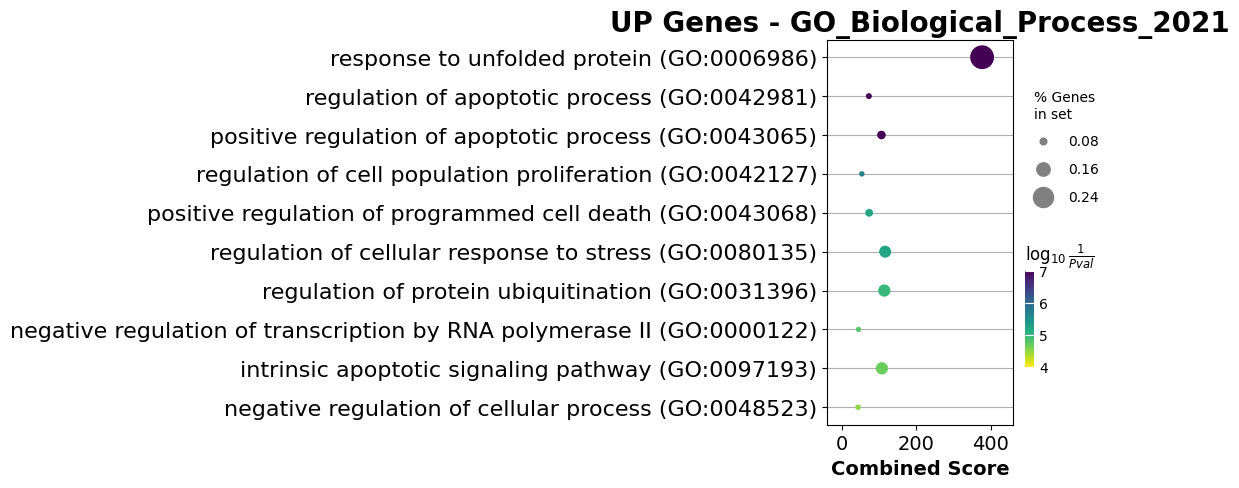

In [ ]:
dotplot(enr_up.res2d, title='UP Genes - GO_Biological_Process_2021',cmap='viridis_r', size=10, figsize=(3,5))

In [ ]:
# Down-regulated genes, cis vs untrt
enr_down = gp.enrichr(gene_list=gene_names_down,
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='mouse',
                 outdir=None,
                )
enr_res_down = enr_down.results

enr_res_down.loc[enr_res_down['Adjusted P-value'] < .05]

Gene_set  \
0   GO_Biological_Process_2021   
1   GO_Biological_Process_2021   
2   GO_Biological_Process_2021   
3   GO_Biological_Process_2021   
4   GO_Biological_Process_2021   
5   GO_Biological_Process_2021   
6   GO_Biological_Process_2021   
7   GO_Biological_Process_2021   
8   GO_Biological_Process_2021   
9   GO_Biological_Process_2021   
10  GO_Biological_Process_2021   
11  GO_Biological_Process_2021   
12  GO_Biological_Process_2021   
13  GO_Biological_Process_2021   
14  GO_Biological_Process_2021   
15  GO_Biological_Process_2021   
16  GO_Biological_Process_2021   
17  GO_Biological_Process_2021   
18  GO_Biological_Process_2021   
19  GO_Biological_Process_2021   
20  GO_Biological_Process_2021   
21  GO_Biological_Process_2021   
22  GO_Biological_Process_2021   
23  GO_Biological_Process_2021   
24  GO_Biological_Process_2021   
25  GO_Biological_Process_2021   
26  GO_Biological_Process_2021   
27  GO_Biological_Process_2021   
28  GO_Biological_Process_2021   
29  GO_Biological_Process_2021   
30  GO_Biological_Process_2021   
31  GO_Biological_Process_2021   
32  GO_Biological_Process_2021   
33  GO_Biological_Process_2021   
34  GO_Biological_Process_2021   
35  GO_Biological_Process_2021   
36  GO_Biological_Process_2021   

                                                 Term   Overlap       P-value  \
0                protein phosphorylation (GO:0006468)    40/496  1.369844e-07   
1   regulation of intracellular signal transductio...    36/437  3.496168e-07   
2   positive regulation of transcription, DNA-temp...   69/1183  1.719073e-06   
3   positive regulation of nucleic acid-templated ...    37/511  5.185300e-06   
4   positive regulation of developmental process (...    19/177  5.279765e-06   
5                    filopodium assembly (GO:0046847)      6/16  6.978957e-06   
6   positive regulation of transcription by RNA po...    55/908  7.009103e-06   
7                        phosphorylation (GO:0016310)    31/400  7.929736e-06   
8   transcription initiation from RNA polymerase I...    16/140  1.311480e-05   
9   regulation of small GTPase mediated signal tra...    16/141  1.435647e-05   
10  plasma membrane bounded cell projection assemb...    24/278  1.450753e-05   
11   regulation of embryonic development (GO:0045995)      8/36  1.611434e-05   
12          regulation of cell migration (GO:0030334)    30/408  3.014349e-05   
13    transcription by RNA polymerase II (GO:0006366)    25/320  5.171820e-05   
14           protein autophosphorylation (GO:0046777)    16/159  6.349378e-05   
15  regulation of transcription, DNA-templated (GO...  105/2244  7.313691e-05   
16  regulation of plasma membrane bounded cell pro...     10/70  8.386761e-05   
17  positive regulation of cell projection organiz...    13/117  1.116732e-04   
18  positive regulation of lipid metabolic process...      6/25  1.202137e-04   
19    positive regulation of JNK cascade (GO:0046330)     10/73  1.203750e-04   
20  DNA-templated transcription, initiation (GO:00...    16/168  1.222395e-04   
21             regulation of JNK cascade (GO:0046328)    12/105  1.552694e-04   
22  positive regulation of cell migration (GO:0030...    21/269  2.034473e-04   
23       cellular response to starvation (GO:0009267)    15/158  2.042934e-04   
24  positive regulation of GTPase activity (GO:004...    18/214  2.297888e-04   
25  regulation of transcription by RNA polymerase ...  101/2206  2.298101e-04   
26  positive regulation of developmental growth (G...      8/52  2.536430e-04   
27  negative regulation of transcription, DNA-temp...    51/948  3.008703e-04   
28  cellular protein modification process (GO:0006...   54/1025  3.341010e-04   
29         regulation of hippo signaling (GO:0035330)      5/20  3.688218e-04   
30  positive regulation of embryonic development (...      5/20  3.688218e-04   
31                     brain development (GO:0007420)    14/150  3.921660e-04   
32  positive regulation of biosynthetic process (G...   

<Axes: title={'center': 'DOWN Genes - GO_Biological_Process_2021'}, xlabel='Combined Score'>

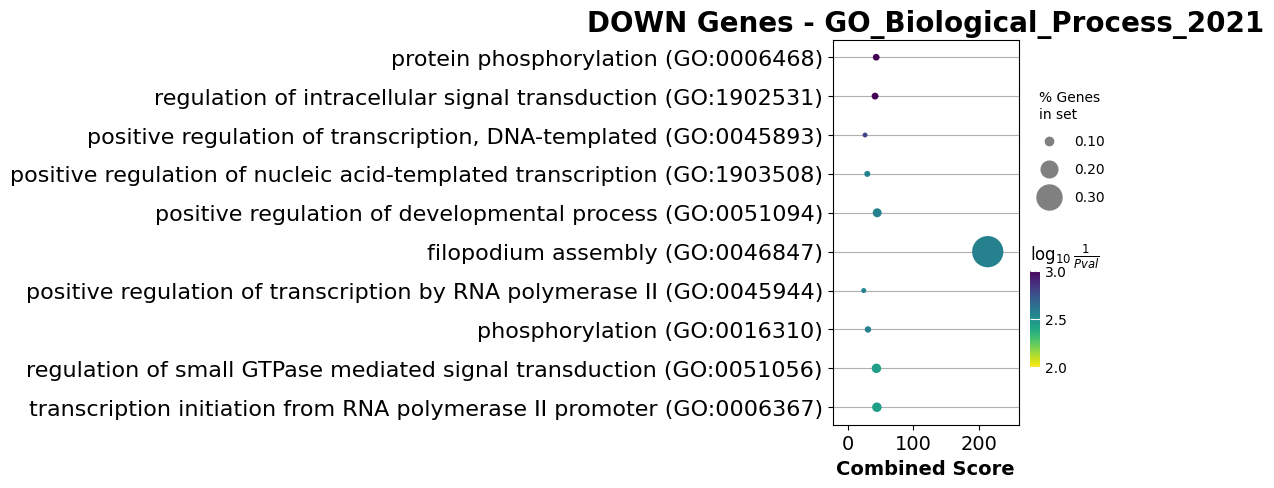

In [ ]:
dotplot(enr_down.res2d, title='DOWN Genes - GO_Biological_Process_2021',cmap='viridis_r', size=10, figsize=(3,5))